# Explore here

# Medical insurance


In [59]:
import pandas as pd 

medical_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
medical_data.shape
medical_data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [61]:
if medical_data.duplicated().sum():
    medical_data = medical_data.drop_duplicates()
print(medical_data.shape)
medical_data.head()

(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
medical_data = medical_data.drop_duplicates().reset_index(drop = True)
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [63]:
medical_data.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1332   50    male  30.970         3     no  northwest  10600.54830
1333   18  female  31.920         0     no  northeast   2205.98080
1334   18  female  36.850         0     no  southeast   1629.83350
1335   21  female  25.800         0     no  southwest   2007.94500
1336   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]>

/tmp/ipykernel_992/1667920433.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


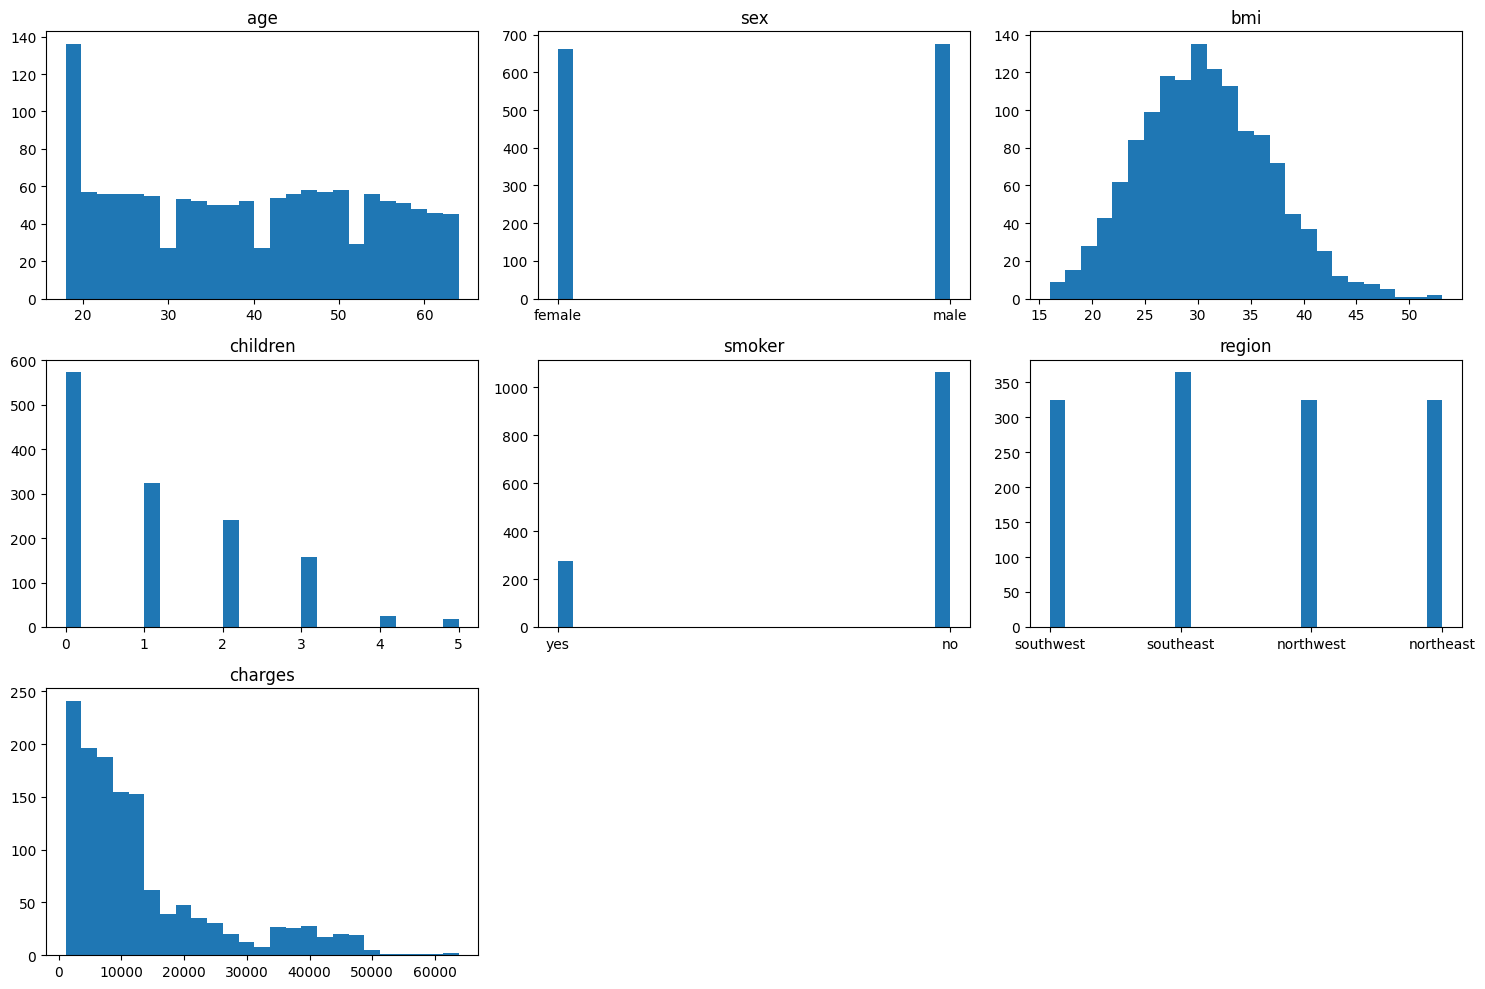

In [64]:
import seaborn as sns 
import matplotlib.pyplot as plt

nrows = 3
ncols = 3

fig, axis = plt.subplots(ncols = ncols, nrows = nrows, figsize = (15, 10), constrained_layout = True)

for n, col in enumerate(medical_data.columns):
    row = n // ncols
    col_id = n % ncols
    axis[row, col_id].hist(medical_data[col], bins= 25)
    axis[row, col_id].set_title(col)
    
    
plt.tight_layout()
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])
plt.show()

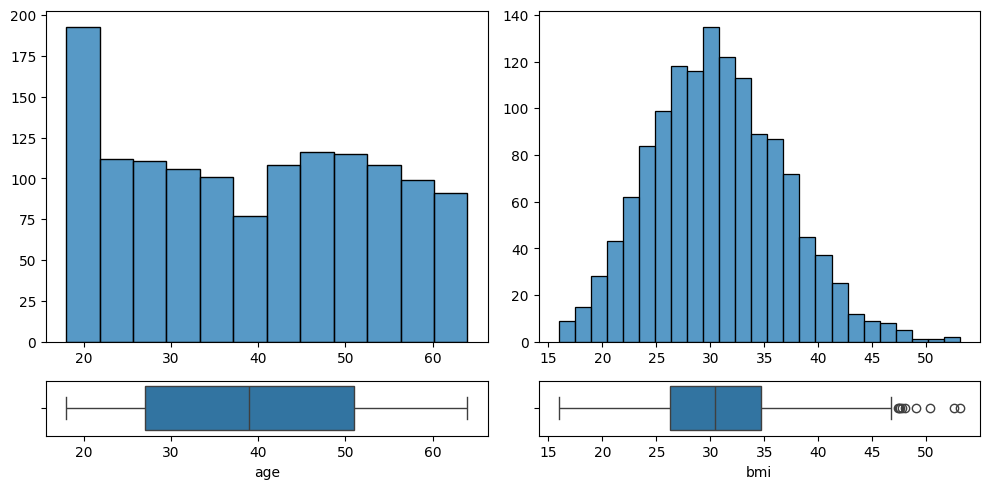

In [65]:
fig, axis = plt.subplots(2, 2, figsize = (10, 5), gridspec_kw={'height_ratios': [6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = medical_data, x = 'age').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 0], data = medical_data, x = 'age')
sns.histplot(ax = axis[0, 1], data = medical_data, x = 'bmi').set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = medical_data, x = 'bmi')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
factorize_col = ['sex', 'smoker', 'region']

#Iterar sobre las columnas y aplicar pd.factorize
for col in factorize_col:
    medical_data[col] = pd.factorize(medical_data[col])[0]

medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


<Axes: >

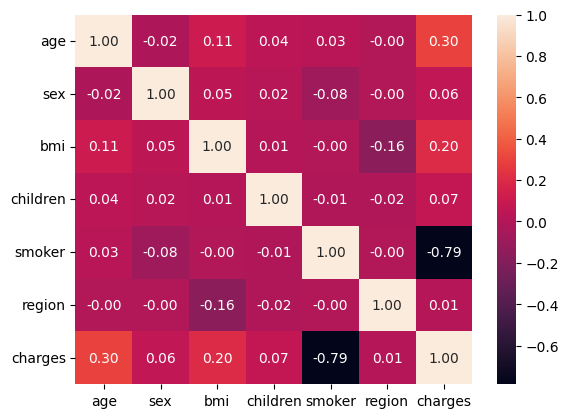

In [67]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.heatmap(medical_data[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr(), annot= True, fmt ='.2f')

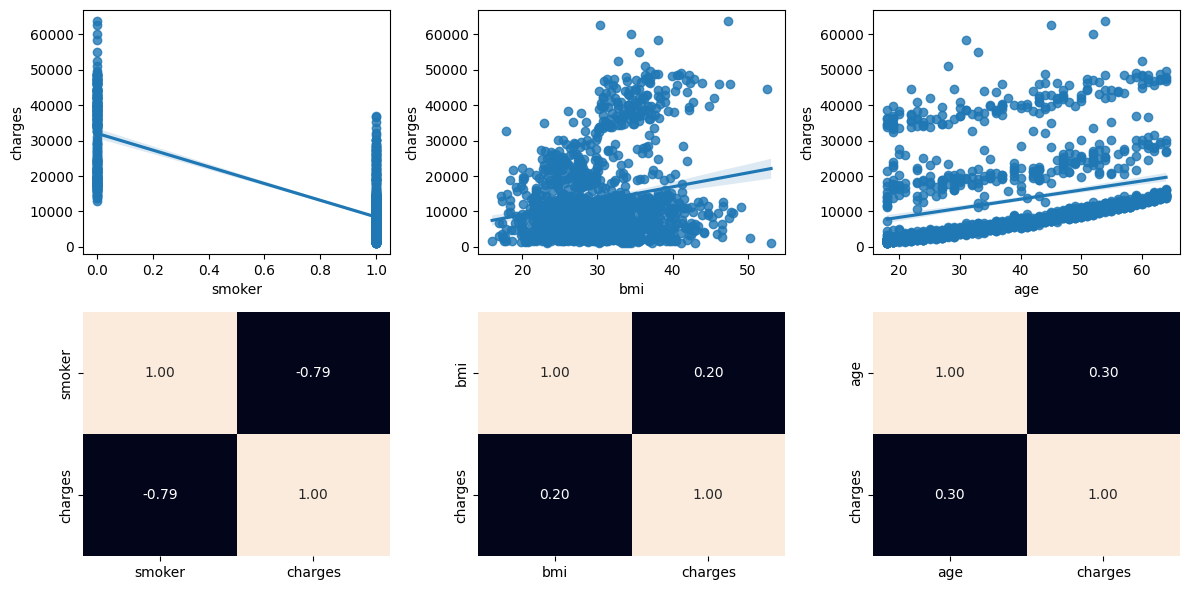

In [68]:
fig, axis = plt.subplots(2, 3, figsize = (12, 6))

sns.regplot(ax = axis[0, 0], data = medical_data, x = 'smoker', y = 'charges')
sns.heatmap(medical_data[['smoker', 'charges']].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = medical_data, x = 'bmi', y = 'charges')
sns.heatmap(medical_data[['bmi', 'charges']].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = medical_data, x = 'age', y = 'charges')
sns.heatmap(medical_data[['age', 'charges']].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

plt.tight_layout()

plt.show()

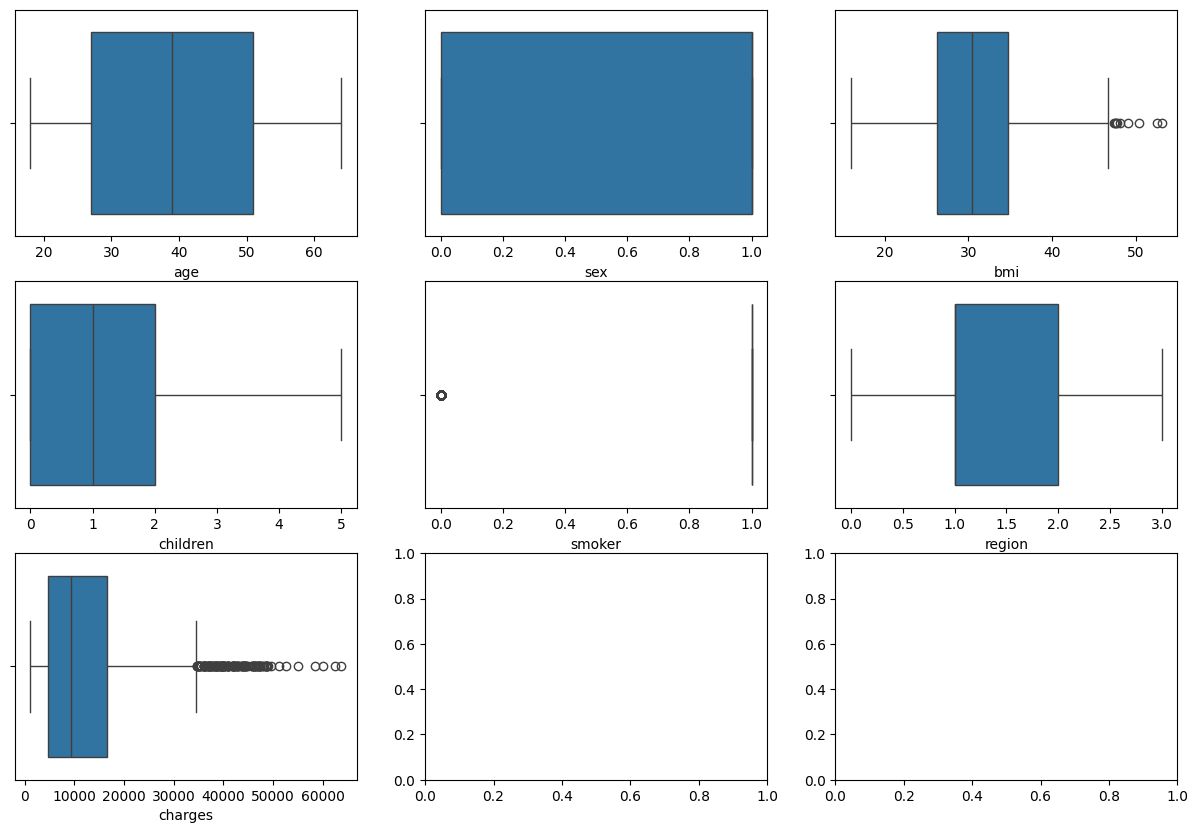

In [69]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Iterar sobre las columnas y crear los boxplots
for i, column in enumerate(medical_data):

    sns.boxplot(ax=axes[i // 3, i % 3], data=medical_data, x=column)


**Split**

In [71]:
from sklearn.model_selection import train_test_split

#Divido dataset en train y test

X = medical_data.drop('charges', axis =1)
y = medical_data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 11)

X_train.head()

X_train.to_csv('../data/processed/Xtrain.csv', index=False)
X_test.to_csv('../data/processed/Xtest.csv', index=False)
y_train.to_csv('../data/processed/ytrain.csv', index=False, header=['charges'])
y_test.to_csv('../data/processed/ytest.csv', index=False, header=['charges'])

**Feature selection**

In [72]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k= int(len(X_train.columns) * 0.7))
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel= pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age,sex,bmi,children,smoker,region
316,50,1,32.205,0,1,2
340,24,0,27.600,0,1,0
151,48,1,29.700,0,1,1
1281,18,0,21.660,0,0,3
557,34,1,34.210,0,1,1


In [73]:
y_test.head(10)

1312    36397.57600
1253     4415.15880
372      7639.41745
937      2304.00220
484      9563.02900
447     11454.02150
220      5012.47100
246     12648.70340
920     13462.52000
1070    13974.45555
Name: charges, dtype: float64

In [74]:
from sklearn.preprocessing import StandardScaler
from pickle import dump

#creo scaler
scaler = StandardScaler()

#Ajusto el escalador a los datos de entrenamiento y transformo
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index = X_train.index, columns = X_train.columns)

#transformo test data
X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index= X_test.index, columns= X_test.columns)

#Guardo mis datos normalizados
X_train_norm.to_csv('../data/processed/medical-train_X_norm.csv', index= False)
X_test_norm.to_csv('../data/processed/medical-test_X_norm.csv', index= False)

#exporto datos escalados
dump(scaler, open('../models/normal_scaler.pk', 'wb'))

X_train_norm.head()

,age,sex,bmi,children,smoker,region
316,0.744698,0.980545,0.256080,-0.899288,0.514868,0.468195
340,-1.112136,-1.019841,-0.498938,-0.899288,0.514868,-1.325712
151,0.601864,0.980545,-0.154630,-0.899288,0.514868,-0.428759
1281,-1.540637,-1.019841,-1.472837,-0.899288,-1.942246,1.365148
557,-0.397969,0.980545,0.584812,-0.899288,0.514868,-0.428759


In [75]:
y_train.head(15)

316      8835.26495
340     18955.22017
151      7789.63500
1281    14283.45940
557      3935.17990
508      3044.21330
1017    12495.29085
1034    12094.47800
867     13129.60345
1300    46718.16325
202     13012.20865
365      9778.34720
425      9788.86590
349      1635.73365
1200     8733.22925
Name: charges, dtype: float64